#  Battle of Neighbourhoods

**This notebook consist of six parts."**

##  1. Introduction/Business Problem

      (a) Discussion of the business problem and the audience who would be interested in this project.

## 2.  Data Section

      (a) What data is used?
      (b) Importing Libraries
      (c) Credentials and Core location
      (d) Search for hotel & restaurant within 1 KM
      (e) Location of Hotels

## 3. Methodology Section

      (a) How Far are hotels from the core location
      (b) Explore for other venues around Chandigarh
      (c) Extract Venues using Search Queries
      (d) Location of all venues
      (e) How far are venues from the core location?
      (f) Venue Categories
      (g) Rating of all Venues
      (h) Number of Tips for all Venues
      (i) Extracting Rated and Tips Venues
      (j) Final list of Venues
      (k) Clustering based on venues
      (l) Center of all clusters & Midpoint of all venues

##  4. Results Section

      (a) My hotel location
      (b) Top Rated Venues
      (c) Spot my hotel against others
      

## 5. Discussion Section

## 6. Conclusion Section

# _______________________________________________

# 1. Introduction/Business Problem

##  (a) Discussion of the business problem and the audience who would be interested in this project.

### (i). Something about the tourist place - CHANDIGARH, INDIA

I am from Chandigarh, a beautiful tourist spot in nothern India.Chandigarh, the capital of the nothern Indian states of Punjab and Haryana, was designed by the Swiss-French mordernist architect, Le Carbusier. His buildings include the capitol complex with its High Court, Secretariat and Legislative Assembly, as well as giant Open Hand Monument. The nearby Rock Garden is a park featuring sculptures made of stones, recycled ceramics and industrial relics. The most soothening location is the Sukhna Lake, one the most attrating location for tourists.

### (ii). Opening of Hotel/Restaurant Shop

Coming down to business problem,I would like to open a hotel/restaurant in the centremost part of it. As it is a famous tourist spot,there is already lots of attention towards it.I know there will be many competitors in terms of hotel and restaurant. But keeping them in mind,i need to locate my hotel in place where more people are attracted and comfortable for a stay and a good meal. I want to bring foreign and local peoples attention towards my new hotel. I would like to flavour my retaurant recipe with Italian,American,typical south & north indian foods to grab their taste.

_**The challenge is to find a suitable location for opening a new hotel / restaurant attracted to all local and foreign people in the centre of all famous venues**_

### (iii). Expected / Interested Audience

85% indians and 15% foreign peoples visit Chandigarh once in a year.Some people stay for couple of days or more.Also they find some place for hangout or a good meal. Their main focus might be belonging to stay somewhere near to reach venues or to the main hub where everything is easily available. Apart from these set of people, students and working professionals are common audience here. So we may need to fascinate them all.

# 2. DATA DESCRIPTION

## (a) Data used

We will be completely working on Foursquare data to explore and try to locate our new hotel,  as its prime data gathering source as it has a database of millions of places, especially their places API which provides the ability to perform location search, location sharing and details about a business.

We will need data about different venues in different neighborhoods of that specific borough. In order to gain that information we will use "Foursquare" locational information. Foursquare is a location data provider with information about all manner of venues and events within an area of interest. Such information includes venue names, locations, menus and even photos.

The data retrieved from Foursquare contained information of venues within a specified distance of the longitude and latitude of the postcodes. The information obtained per venue as follows:

- Area
- Area Latitude
- Area Longitude
- Venue
- Name of the venue e.g. the name of a store or restaurant
- Venue Latitude
- Venue Longitude
- Venue Category

### How it will be used to solve the problem?

We will looking for midpoint area of venues to locate our new hotel.Before that our major focus will be on all venues present in and around the core place of Chandigarh.

Just a heads up on how many hotels are distributed now around Chandigarh. We will perform some EDA on hotels & restaurants present in the tourist spot.On furthur notebook we will use Foursquare data to determine other venues as well. As such, the foursquare location platform will be used as the sole data source since all the stated required information can be obtained through the API.

After finding the list of venues, we then connect to the Foursquare API to gather information about venues inside each and every neighborhood. For each neighborhood, we have chosen the radius to be 1000 meter.

## (b) Importing Libraries

In [1]:
# Import libraries
import numpy as np # data in a vectorized manner manipulation
import pandas as pd # data analsysis
import requests # HTTP library
from bs4 import BeautifulSoup # scraping library

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # JSON files manipulation

from sklearn.cluster import KMeans # clustering algorithm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

#!conda install -c conda-forge folium=0.5.0 --yes
import folium
!pip install folium # map rendering library

print("*********   Loaded library     ***********")

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
*********   Loaded library     ***********


## (c)  Credentials and Core location

In [2]:
CLIENT_ID = 'LRYYQP0Z2RTNE4QOANI5APS2ZVOG3N5OXB223ZSN2DOZ4KHP' # your Foursquare ID
CLIENT_SECRET = 'ENFTY0NASBED3VH0JOM1AY4NH51UB3RGHIUREAOSRGWA5BZZ' # your Foursquare Secret
VERSION = '20210722'
LIMIT = 150

address = "sector-17, chandigarh"

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude =location.latitude    # location.latitude 
longitude =location.longitude  # location.longitude # 

chd='Chandigarh location : {},{}'.format(latitude,longitude)
print(chd)

Chandigarh location : 30.7400652,76.7825889


## (d) Search for hotel & restaurant within 1 KM

In [127]:
#Quering for hotel & restaurant

search_query = 'hotel'
search_query_res = 'restaurant'

radius = 1000
url_hotel = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url_restaurant = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_res, radius, LIMIT)
#url

**Send the GET Request of hotel & restaurants and examine the results**

In [5]:
results_hotel = requests.get(url_hotel).json()
results_restaurant = requests.get(url_restaurant).json()
#results_hotel

**Get relevant part of JSON and transform it into a pandas dataframe**

In [6]:
# assign relevant part of JSON to venues
venues_hotel = results_hotel['response']['venues']
venues_restaurant = results_restaurant['response']['venues']

# tranform venues into a dataframe and merging both data
dataframe_hotel = json_normalize(venues_hotel)
dataframe_restaurant = json_normalize(venues_restaurant)

dataframe = pd.concat([dataframe_hotel,dataframe_restaurant])

print("There are {} restaurants and hotels at Chandigarh".format(dataframe.shape[0]))

There are 25 restaurants and hotels at Chandigarh


/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


**Define information of interest and filter dataframe**

In [7]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

    
# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

  
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

#dataframe_filtered
hotels_df=dataframe_filtered[['name','categories','distance','lat','lng','id']]
hotels_df.head()

,name,categories,distance,lat,lng,id
0,Taj Hotel,Hotel,636,30.745340,76.785161,4bc8db62762beee1d69a3d38
1,Hotel Shivalik View,Hotel,583,30.739890,76.776496,4e3ec5391495bf24a5ec0c51
2,Hotel Corporate Inn,Hotel,746,30.746130,76.785923,4bd79397304fce7226b833ab
3,Hotel Piccadily,Hotel,937,30.733332,76.776710,4bd10e6620cd9960c4ae2e9e
4,Hotel Komfort Inn,Hotel Pool,103,30.739159,76.782327,5167015ee4b0e36021fdc146


## (e)  Location of Hotels

In [131]:
import folium
!pip install folium
hotels_map = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around the Kanyakumari

# add a red circle marker to represent the core location of chandigarh
folium.features.Marker(
    [latitude, longitude],
     marker_color='red',
    popup='chandigarh',
    fill = True,
    fill_opacity = 0.6
).add_to(hotels_map)

# add the hotels as orange circle markers
for lat, lng, label in zip(hotels_df.lat, hotels_df.lng, hotels_df.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=10,
        color='orange',
        popup=label,
        fill = True,
        fill_color='darkred',
        fill_opacity=0.7
    ).add_to(hotels_map)

# display map
hotels_map

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


# 3. Methodology section

In this sections we will perform some data analysis and EDA to find insight from data.We will try to understand the current stats of all given data.Probably,clustering or centroid of all venues will help us to locate new hotel.

## (a) How Far are hotels from the core location

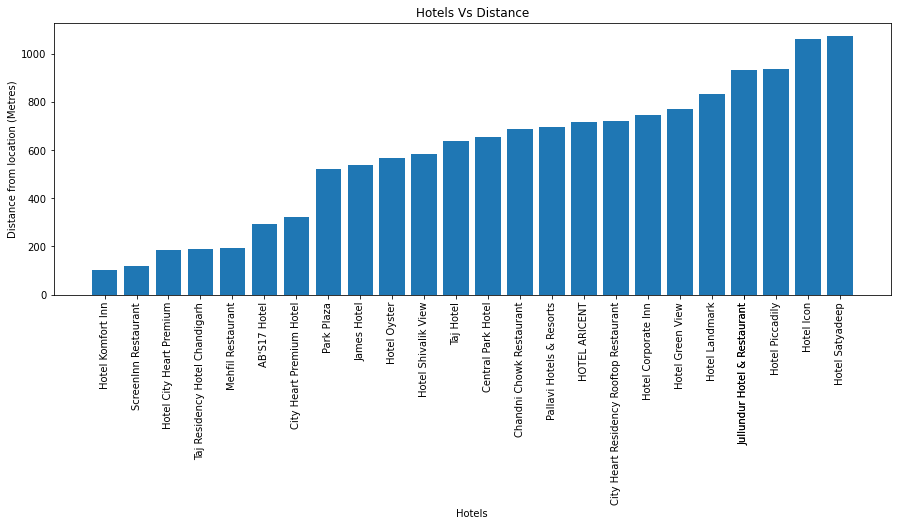

Average distance between hotels and core location is 600 metres


In [45]:
distance_hotel_df=dataframe_filtered[['name','categories','distance','lat','lng']].sort_values('distance')

def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(distance_hotel_df.name))
    plt.bar(distance_hotel_df.name, distance_hotel_df.distance)
    plt.rcParams["figure.figsize"]=(15,5)
    plt.xlabel('Hotels')
    plt.ylabel('Distance from location (Metres)')
    plt.xticks(distance_hotel_df.name,rotation=90)
    plt.title('Hotels Vs Distance')
    plt.show()
plot_bar_x()

print("Average distance between hotels and core location is {} metres".format(int(sum(hotels_df['distance'])/hotels_df.shape[0])))

### Few Take Aways

- Hotel Satyadeep is far than rest of the hotels
- Hotel Komfort Inn remains close to the core spot.
- 600 metres is average distance from all hotels to core location.

##  (b) Explore for other venues around Chandigarh

A tourist person always wants to visit nearby iconic places.So he wants to reside somewhere nearby to all major venues.We will be exploring more venues around the core location.We will be digging more on main areas or place around 1 km.

In [46]:
radius=1000
url_venues = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
#url_venues

In [47]:
import requests

results_venues = requests.get(url_venues).json()
'There are {} venues around chandigarh.'.format(len(results_venues['response']['groups'][0]['items']))

'There are 26 venues around chandigarh.'

Get relevant part of JSON and transform it into a pandas dataframe

In [48]:

items_venues = results_venues['response']['groups'][0]['items']
#items_venues[0]

In [49]:
dataframe_venues = json_normalize(items_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe_venues.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered_venues = dataframe_venues.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered_venues['venue.categories'] = dataframe_filtered_venues.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered_venues.columns = [col.split('.')[-1] for col in dataframe_filtered_venues.columns]

dataframe_filtered_venues.name

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


0                    Ghazal
1          Girl In The Café
2                 Sector 17
3              Softy Corner
4            Hot Millions 2
5               Rose Garden
6       Indian Coffee House
7     Hot Millions saladbar
8             Sindhi Sweets
9            Baskin-Robbins
10              Headmasters
11               Park Plaza
12      Hotel Shivalik View
13              Sagar Ratna
14                Taj Hotel
15       Kapsons Chandigarh
16       The Chocolate Room
17     Barista Lavaza Creme
18                      KFC
19               BUFFET HUT
20                 Yo China
21                     Nike
22                     Dera
23                  Gopal's
24         Gopal's,Sector-8
25             CCD Sector 8
Name: name, dtype: object

## (c) Extract Venues using Search Queries

When I searched in google map,I could see there were some venues missing. Which are also more recognized by visitors and local audience.So lets bring their data inside.I am not sure why Foursquare hasnt captured it while trying venue query.

Below is the function to extract many queries at a time by passing them in a single list.

In [67]:
# search query function
search_query_list = ['Chandigarh cricket stadium','theatre','temple'] 
radius =2000
temp_df=[]
search_df=[]

def search_query_fn():   
    #Loop to run through urls and from json to pandas
    for i in range(len(search_query_list)):
        url= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_list[i], radius, LIMIT)
        
        results=requests.get(url).json()
        venues = results['response']['venues']
        
        #Normalize from json
        dataframe = json_normalize(venues)
        
        #Removing unwanted column headers
        dataframe.columns = [col.split('.')[-1] for col in dataframe.columns]
        temp_df.append(dataframe)
    
    #Loop to append dataframes to single dataframe
    for j in range(len(search_query_list)):
        data=temp_df[j]
        search_df.append(data)

# Function to run loop over queries
search_query_fn()

search_df = pd.concat(search_df,sort=True)
search_df['categories'] = search_df.apply(get_category_type, axis=1)
search_df = pd.DataFrame(search_df[['name','categories','distance','lat','lng','id']])
search_df

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,name,categories,distance,lat,lng,id
0,Chandigarh cricket stadium,None,849,30.739022,76.773797,4c94566af244b1f7c584211d
1,Chandigarh Lawn Tennis Association Stadium,Tennis Court,1258,30.751006,76.785893,511f4098e4b09e788d2714a2
0,Neelam Theatre,Movie Theater,139,30.740123,76.781133,4e25a0cc52b17b2b5dd00508
1,KC THEATRE,Movie Theater,557,30.742588,76.787623,4f604448e4b0a32e0eb56858
0,Sanatan Temple - 23,Temple,1518,30.736955,76.767141,521bf60011d2be54a6d62e8b
1,Radha Krishan Mandir,Temple,1099,30.730758,76.786440,4daf46910f2c9a03677ba67d


**We will collate venues provided by foursquare and the ones extracted through hitting search query API**

In [68]:
# Data extracted from foursquare venues
four_sq_venue=pd.DataFrame(dataframe_filtered_venues[['name','categories','distance','lat','lng','id']])

# Data extracted from search queries
new_venues=pd.DataFrame(search_df)

# Concatenate both dataframe
df_venue=pd.concat([four_sq_venue, new_venues],sort=True)

**Let us remove hotel & restaurants and get final list of venues**

We could see that there are some hotels/restaurants in the venues list.So we will remove them from the list.We have them in separate dataframe (hotels_df).

In [84]:
to_drop = ['Hotel', 'Restautant','hotel','Resort','Indian','Hot','Baskin','Softy','Barista','Sindhi','Nike']
df_venues = df_venue[~df_venue['name'].str.contains('|'.join(to_drop))].reset_index()
print("There are {} venues in chandigarh".format(df_venues.shape[0]))
df_venues[['name','distance','id']]

There are 22 venues in chandigarh


,name,distance,id
0,Ghazal,134,4bd1b65d046076b07e477271
1,Girl In The Café,307,4d822ef6baf9a35d1fc8a421
2,Sector 17,71,4c0a1876bbc676b0154e49d5
3,Rose Garden,667,4c0ba827009a0f47975cebbf
4,Headmasters,942,4d1dc86ebdd7a09343cdd6ce
5,Park Plaza,522,4f8e05ade4b0d7a441089c22
6,Sagar Ratna,264,4c430adc3735be9aecd21aa4
7,Kapsons Chandigarh,477,4c42b04cce54e21e421e0d1a
8,The Chocolate Room,753,4dcff2b0183899ddfaf89880
9,KFC,899,4e12b2d5e4cdef074b7ea70f


## (d) Location of all venues

In [133]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the chandigarh
folium.features.Marker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='chandigarh',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the venues as red circle markers
for lat, lng, label in zip(df_venues.lat, df_venues.lng, df_venues.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=10,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

We have listed out number of hotels and venues around kanyakumari.There are 25 Hotels/Restaurant and 30 Venues

## (e) How far are venues from the core location?

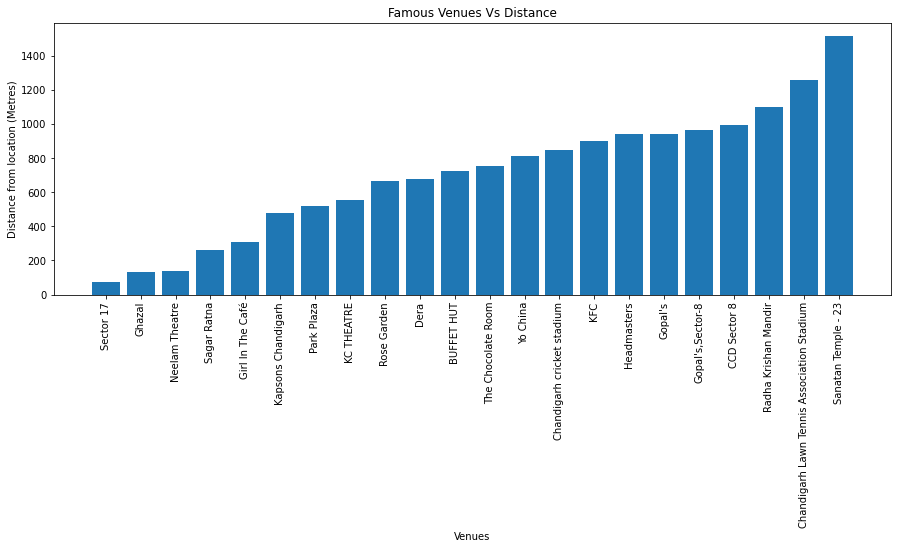

In [86]:
distance_venues_df=df_venues.sort_values('distance')

def plot_bar_venue():
    # this is for plotting purpose
    index = np.arange(len(distance_venues_df.name))
    plt.bar(distance_venues_df.name, distance_venues_df.distance)
    plt.xlabel('Venues')
    plt.ylabel('Distance from location (Metres)')
    plt.xticks(distance_venues_df.name,rotation=90)
    plt.title('Famous Venues Vs Distance')
    plt.show()
plot_bar_venue()

**Few Take Aways**

 - We could see sector-17, Ghazal and Neelam Theatre are more closer to our location.
 - Sanatan Temple is far than rest of places.
 - Rose Garden is also an important venue which is jus few metres from our location

## (f) Venue Categories

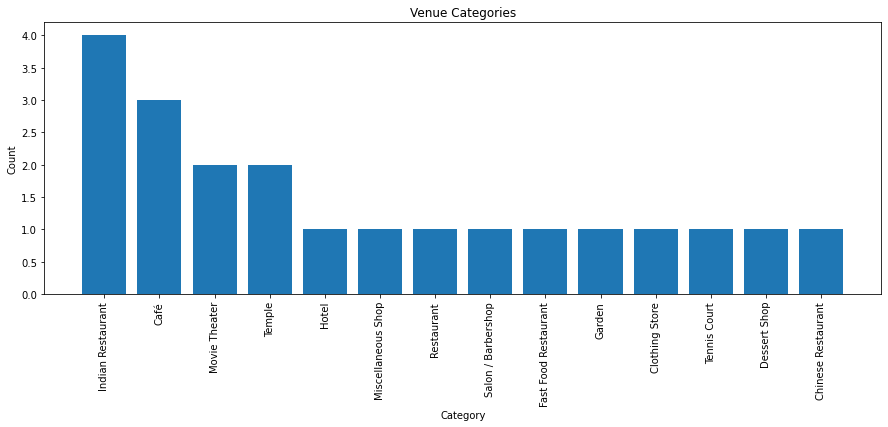

In [88]:
freq_venue=df_venues['categories'].value_counts()
freq_venue=pd.DataFrame(freq_venue).reset_index()
freq_venue.columns=['Category','Count']
freq_venue

def plot_bar_categ():
    # this is for plotting purpose
    index = np.arange(len(freq_venue.Category))
    plt.bar(freq_venue.Category, freq_venue.Count)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(freq_venue.Category,rotation=90)
    plt.title('Venue Categories')
    plt.show()
plot_bar_categ()

Eventhough we didnt have immense data to consider distribution of categories we could see that **Indian Restaurants, cafe, theatre and temple** are more common venues.

## (g) Rating of all Venues

In [90]:
#Rating of venues
rating_df=[]

for k in range(df_venues.shape[0]):
    venue_id=df_venues.id[k]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    #print(result)
    try:
        #print(df_venues.name[k],result['response']['venue']['rating'])
        rating=result['response']['venue']['rating']
        rating_df.append(rating)
        
    except:
        #print(df_venues.name[k],'This venue has not been rated yet.')
        rating='No Rating Yet'
        rating_df.append(rating)

In [91]:
rate_dict = {'Venue': df_venues.name, 'Rating': rating_df,'distance':df_venues.distance}
rate_df=pd.DataFrame(rate_dict)
rate_df

,Venue,Rating,distance
0,Ghazal,7.9,134
1,Girl In The Café,8.1,307
2,Sector 17,7.8,71
3,Rose Garden,8,667
4,Headmasters,7.4,942
5,Park Plaza,6.8,522
6,Sagar Ratna,6.2,264
7,Kapsons Chandigarh,6.1,477
8,The Chocolate Room,6.3,753
9,KFC,6.4,899


## (h) Number of Tips for all Venue

In [96]:
tips_df=[]

for k in range(df_venues.shape[0]):
    venue_id=df_venues.id[k]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    #print(result)
    try:
        #print(df_venues.name[k],result['response']['venue']['rating'])
        tips=result['response']['venue']['rating']
        tips_df.append(tips)
        
    except:
        #print(df_venues.name[k],'This venue has not been rated yet.')
        tips='No tips Yet'
        tips_df.append(tips)


In [98]:
tips_dict = {'Venue': df_venues.name, 'Tips': tips_df,'distance':df_venues.distance}
tips=pd.DataFrame(tips_dict)
tips=tips.sort_values('Tips',ascending = False)
tips

,Venue,Tips,distance
0,Ghazal,No tips Yet,134
1,Girl In The Café,No tips Yet,307
20,Sanatan Temple - 23,No tips Yet,1518
19,KC THEATRE,No tips Yet,557
18,Neelam Theatre,No tips Yet,139
17,Chandigarh Lawn Tennis Association Stadium,No tips Yet,1258
16,Chandigarh cricket stadium,No tips Yet,849
15,CCD Sector 8,No tips Yet,994
14,"Gopal's,Sector-8",No tips Yet,963
13,Gopal's,No tips Yet,944


## (i) Extracting Rated and Tips Venues

In [99]:
# Add Tips column to Rating Dataframe
rate_df['Tips']=tips['Tips']

#Lets take values of only rated venues
only_rated_tips = rate_df[(rate_df['Rating']!='No Rating Yet') | (rate_df['Tips']!=0)]

only_rated_tips.reset_index(inplace = True,drop = True) 
only_rated_tips

,Venue,Rating,distance,Tips
0,Ghazal,7.9,134,No tips Yet
1,Girl In The Café,8.1,307,No tips Yet
2,Sector 17,7.8,71,No tips Yet
3,Rose Garden,8,667,No tips Yet
4,Headmasters,7.4,942,No tips Yet
5,Park Plaza,6.8,522,No tips Yet
6,Sagar Ratna,6.2,264,No tips Yet
7,Kapsons Chandigarh,6.1,477,No tips Yet
8,The Chocolate Room,6.3,753,No tips Yet
9,KFC,6.4,899,No tips Yet


## (j) Final list of Venues

In [100]:
rated_list=[]
for i in range(len(only_rated_tips)):
    rated_tip_temp=only_rated_tips['Venue'][i]
    rated_list.append(rated_tip_temp)

#Masking all values present in list
mask = df_venues['name'].isin(rated_list)

final_venues = df_venues[mask]
#final_venues['location']=final_venues['lat'].astype(str).str.cat(final_venues['lng'].astype(str), sep=' - ')
final_venues.reset_index(inplace = True,drop = True) 

final_venues

,index,categories,distance,id,lat,lng,name
0,0,Indian Restaurant,134,4bd1b65d046076b07e477271,30.739055,76.783358,Ghazal
1,1,Café,307,4d822ef6baf9a35d1fc8a421,30.737845,76.784498,Girl In The Café
2,2,Miscellaneous Shop,71,4c0a1876bbc676b0154e49d5,30.739541,76.782158,Sector 17
3,5,Garden,667,4c0ba827009a0f47975cebbf,30.746004,76.781645,Rose Garden
4,10,Salon / Barbershop,942,4d1dc86ebdd7a09343cdd6ce,30.739975,76.792441,Headmasters
5,11,Hotel,522,4f8e05ade4b0d7a441089c22,30.744613,76.783930,Park Plaza
6,13,Indian Restaurant,264,4c430adc3735be9aecd21aa4,30.737845,76.783578,Sagar Ratna
7,15,Clothing Store,477,4c42b04cce54e21e421e0d1a,30.742131,76.786966,Kapsons Chandigarh
8,16,Café,753,4dcff2b0183899ddfaf89880,30.744549,76.788487,The Chocolate Room
9,18,Fast Food Restaurant,899,4e12b2d5e4cdef074b7ea70f,30.739997,76.791995,KFC


## (k) Clustering based on venues

Now lets do some prediction to locate our new hotel in centre of final list of venues.

In [105]:
# one hot encoding
neighbor_onehot = pd.get_dummies(final_venues[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
neighbor_onehot['name'] = final_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [neighbor_onehot.columns[-1]] + list(neighbor_onehot.columns[:-1])
neighbor_onehot = neighbor_onehot[fixed_columns]

neighbor_onehot.head()

,name,Café,Chinese Restaurant,Clothing Store,Dessert Shop,Fast Food Restaurant,Garden,Hotel,Indian Restaurant,Miscellaneous Shop,Movie Theater,Restaurant,Salon / Barbershop,Temple,Tennis Court
0,Ghazal,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Girl In The Café,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Sector 17,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Rose Garden,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Headmasters,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [106]:
neighbor_onehot.shape
neighbor_grouped = neighbor_onehot.groupby('name').mean().reset_index()

In [107]:
# Top 10 venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['name'] = neighbor_grouped['name']

In [108]:
# Clustering

# set number of clusters
kclusters = 3

neighbor_grouped_clustering = neighbor_grouped.drop('name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(neighbor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Clustersss', kmeans.labels_)

neighbor_merged = final_venues

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
neighbor_merged = neighbor_merged.join(neighborhoods_venues_sorted.set_index('name'), on='name')

kmeans

KMeans(n_clusters=3, random_state=0)

## (l) Center of all clusters & Midpoint of all venues

**We will be collating the location of centroid of all clusters and midpoint of all venues to get more accurate location**

In [109]:
fin=neighbor_merged.groupby(['Clustersss']).mean()

lati=sum(fin.lat)/len(fin.lat)
longi=sum(fin.lng)/len(fin.lng)

#Taking midpoint of top ten closest hotel
venues_lan=sum(final_venues.lat)/len(final_venues.lat)
venues_lng=sum(final_venues.lng)/len(final_venues.lng)

final_latitude=(lati+venues_lan)/2
final_longitude=(longi+venues_lng)/2

print("Final location (orange Dot in our below given map) of our brand new hotel:{},{}".format(final_latitude,final_longitude))

Final location (orange Dot in our below given map) of our brand new hotel:30.74095810367231,76.78602046203926


In [128]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=17)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

folium.features.CircleMarker(
    [final_latitude, final_longitude],
    radius=15,
    color='black',
    popup='My hotel',
    fill = True,
    fill_color = 'orange',
    fill_opacity = 0.9
).add_to(map_clusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighbor_merged['lat'], neighbor_merged['lng'], neighbor_merged['name'], neighbor_merged['Clustersss']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)

       
map_clusters

# 4. Results section

## (a) My hotel location

- Final location is pointed at 30.7409581,76.7860204

- This location is at the centre of the main market of sector 17.

- Located at exact junction , which can give more attention to people who passby.

## (b) Top Rated Venues

- Ghazal
- Girl in cafe
- Sector-17
- Rose Garden

All these venues are rated well than other and located within 600 metres to core location of chandigarh. So tourists may like to visit these places.

## (c) Spot my hotel against others

- popup marker - My hotel location
- Green - Chandigarh core location.
- orange - Venues.
- Blue - Other hotels.
- My predicted location and core location are very close to each other which is expected.As this has central attraction,the predicted one almost matched with the core.

In [134]:
my_hotel_vs_all = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around the Kanyakumari


# add a red circle marker to represent the my hotel location
folium.features.Marker(
    [final_latitude, final_longitude],
    icon=folium.Icon(color='red',icon='home'),
    popup='My Hotel',
    fill = True,
    fill_color = 'orange',
    fill_opacity = 0.6
).add_to(my_hotel_vs_all)


# add a green circle marker to represent the core location of chandigarh
folium.features.CircleMarker(
    [latitude, longitude],
    radius=50,
    color='green',
    popup='chandigarh',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.3
).add_to(my_hotel_vs_all)

# add the hotels as blue circle markers
for lat, lng, label in zip(hotels_df.lat, hotels_df.lng, hotels_df.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=7,
        color='black',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.8
    ).add_to(my_hotel_vs_all)
    
    
markers_colors = []
for lat, lon, poi, cluster in zip(neighbor_merged['lat'], neighbor_merged['lng'], neighbor_merged['name'], neighbor_merged['Clustersss']) :
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color='black',
        fill=True,
        fill_color='orange',
        fill_opacity=0.7).add_to(my_hotel_vs_all)


# display map
my_hotel_vs_all

#  5. Discussion section

From above reports,we could get an idea why the predicted one is pointed/clustered on the given spot.First most thing could be the center of attraction for the place.

KMeans have figured out the most common place for all the venues.This output was very adjacent to the core location.This proves the accurate spotting of our predicted algorithm.

Despite of the findings,there were some lack in data.Tips and ratings were missing for most of the venues.Also when I compared foursquare data with google map ,i could see there were many hotels and venues found missing in foursquare.

# 6. Conclusion section

As a business person,one would be able to set up a hotel/restaurant on given spot.This will bring revenue automatically as we have located in very near to core one.We proved this with Kmeans.

**Future Expectation:**

As mentioned earlier,most of data needs to be extracted from googlemaps.Even though we got somewhat accurate prediction.To be very confident on concluding our output,we may need more data to analyse.

Research based on hotel reviews and restaurant menus could be used for future purpose.

**My Experience:**

It was wonderful journey for me in IBM capstone and other courses.It can aid to layman people as well who dont know a pinch of Data science.Thanks to Coursera for keeping Skilful instructors with their awesome materials

## THANK YOU!! HAPPY LEARNING !!!